# (실습) 데이터 그룹화

넘파이와 판다스 기본 설정

In [ ]:
import numpy as np
import pandas as pd

np.set_printoptions(precision=6, suppress=True)
PREVIOUS_MAX_ROWS = pd.options.display.max_rows # 원래 60이 기본.
pd.options.display.max_rows = 20

**문제 1**

아래 그림은 붓꽃 데이터셋에서 품종별 5개의 샘플에 대해
네 가지 특성(꽃받침의 길이와 너비, 꽃잎의 길이와 너비)의 평균값을 계산해서
새로운 데이터프레임을 생성하기 위해 밟아야 하는
쪼개고, 적용하고, 조합하는 과정을 보여준다.
이 과정을 붓꽃 전체 데이터셋을 대상으로 직접 실행하는 코드를 작성하라.

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/split-apply-combine02.png" style="width:90%;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://irresistable89.blogspot.com/2020/05/pandas-groupby-sort-top-n.html">Pandas Groupby Sort Top N</a>&gt;</div></p>

모범답안

아래 코드는 인터넷 데이터 저장소로부터 아이리스(붓꽃) 데이터(`iris.data`)를
2차원 넘파이 어레이로 불러온다.

In [ ]:
# 아이리스(붓꽃) 데이터 불러오기
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='str')

`iris.data` 파일에는 아래 형식의 데이터가 150개 들어 있다.

```python
5.1,3.5,1.4,0.2,Iris-setosa
```

하나의 데이터에 사용된 값들은 하나의 아이리스(붓꽃)에 대한 꽃잎, 꽃받침과 관련된 특성(features)과 품종을 나타내며,
보다 구체적으로 아래 순서를 따른다.

```
꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비, 품종
```

In [ ]:
type(iris)

numpy.ndarray

In [ ]:
iris.shape

(150, 5)

길이와 너비를 저장하는 특성들은 숫자로 저장되어 있었지만 위 코드는 문자열로 저장된 품종 특성과의 자료형을 통일시키기 위해
모두 문자열 자료형으로 불러왔다.
처음 5개 데이터를 확인하면 다음과 같다.

__참고:__ `'<U15'`는 길이가 최대 15인 유니코드 문자열 자료형을 나타낸다.

In [ ]:
iris[:5]

array([['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
       ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
       ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
       ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
       ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa']], dtype='<U15')

두 어레이를 판다스의 데이터프레임으로 형변환한다.
이때 각 열의 이름을 사용된 데이터 특성을 반영하도록 지정한다.

In [ ]:
columns = ['꽃받침길이', '꽃받침너비', '꽃잎길이', '꽃잎너비', '품종']
iris = pd.DataFrame(iris, columns=columns)
iris[:5]

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


모든 값이 문자열로 지정되어 있다.

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   꽃받침길이   150 non-null    object
 1   꽃받침너비   150 non-null    object
 2   꽃잎길이    150 non-null    object
 3   꽃잎너비    150 non-null    object
 4   품종      150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


품종을 제외한 열은 모두 부동소수점 자료형으로 변환한다.

In [ ]:
iris = iris.astype({'꽃받침길이': 'float64', '꽃받침너비': 'float64', '꽃잎길이': 'float64', '꽃잎너비': 'float64'})
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침길이   150 non-null    float64
 1   꽃받침너비   150 non-null    float64
 2   꽃잎길이    150 non-null    float64
 3   꽃잎너비    150 non-null    float64
 4   품종      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


열 인덱스의 라벨을 영어로 변환한다.

In [ ]:
eng_dict = {'꽃받침길이': 'sepal_length',
            '꽃받침너비': 'sepal_width',
            '꽃잎길이': 'petal_length',
            '꽃잎너비': 'petal_width',
            '품종': 'species'}

In [ ]:
iris.rename(columns=eng_dict, inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


`species` 라벨을 맨 앞으로 위치시킨다.

In [ ]:
iris = iris.reindex(columns=['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris

,species,sepal_length,sepal_width,petal_length,petal_width
0,Iris-setosa,5.1,3.5,1.4,0.2
1,Iris-setosa,4.9,3.0,1.4,0.2
2,Iris-setosa,4.7,3.2,1.3,0.2
3,Iris-setosa,4.6,3.1,1.5,0.2
4,Iris-setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,Iris-virginica,6.7,3.0,5.2,2.3
146,Iris-virginica,6.3,2.5,5.0,1.9
147,Iris-virginica,6.5,3.0,5.2,2.0
148,Iris-virginica,6.2,3.4,5.4,2.3


이제 아래 그림 내용을 실행할 수 있다.

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/split-apply-combine02.png" style="width:90%;"></div>

먼저 품종별로 처음 5개의 항목을 구성된 데이터프레임을 생성한다.

In [ ]:
iris_5 = pd.DataFrame()

for i in range(0, 101, 50):
    iris_5 = pd.concat([iris_5, iris.iloc[i:i+5]])

iris_5

,species,sepal_length,sepal_width,petal_length,petal_width
0,Iris-setosa,5.1,3.5,1.4,0.2
1,Iris-setosa,4.9,3.0,1.4,0.2
2,Iris-setosa,4.7,3.2,1.3,0.2
3,Iris-setosa,4.6,3.1,1.5,0.2
4,Iris-setosa,5.0,3.6,1.4,0.2
50,Iris-versicolor,7.0,3.2,4.7,1.4
51,Iris-versicolor,6.4,3.2,4.5,1.5
52,Iris-versicolor,6.9,3.1,4.9,1.5
53,Iris-versicolor,5.5,2.3,4.0,1.3
54,Iris-versicolor,6.5,2.8,4.6,1.5


이제 품종별로 그룹화한 다음에 열별 값들의 합을 계산한다.

In [ ]:
iris_5.groupby('species').sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,24.3,16.4,7.0,1.0
Iris-versicolor,32.3,14.6,22.7,7.2
Iris-virginica,32.0,14.9,28.4,10.5


## 데이터 구간 범주화

연속형 데이터를 구간으로 나누어 범주화를 실행할 수 있다.
설명을 위해 아래 시리즈를 이용한다.

In [ ]:
np.random.seed(17)

arr = pd.Series(np.random.randn(20))
arr

0     0.276266
1    -1.854628
2     0.623901
3     1.145311
4     1.037190
5     1.886639
6    -0.111698
7    -0.362101
8     0.148675
9    -0.437783
10    2.171257
11    1.152310
12   -1.818812
13   -0.138049
14    0.539840
15   -1.775282
16    1.314877
17   -0.473448
18   -1.092230
19   -0.250027
dtype: float64

`hist()` 메서드는 기본 키워드 인자를 사용하면 값의 범위를 10등분해서
각 구간에 속한 값들의 개수를 히스토그램으로 보여준다.

<Axes: >

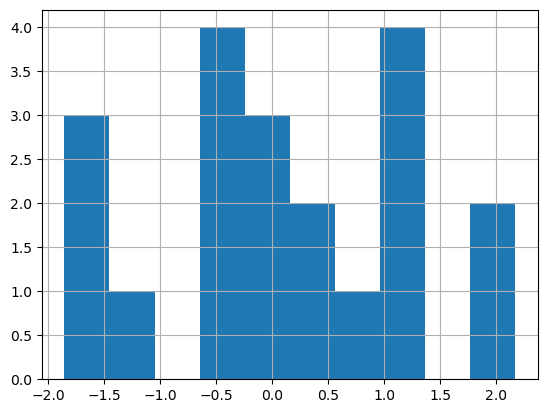

In [ ]:
arr.hist() # bins=10 이 기본

**`pd.cut()` 함수**

시리즈에 포함된 전체 값의 범위를 4등분한 다음에 막대그래프를 그려보자.
이를 위해 먼저 시리즈의 항목을 네 개의 구간으로 분류한다.
`pd.cut()` 함수는 `bins`에 의해 지정된 정수 만큼의 구간으로
기존에 사용된 값들의 구간을 균등하게 등분한 다음에
구간으로 구성된 시리즈를 생성한다.

In [ ]:
factor = pd.cut(arr, bins=4)
factor

0       (0.158, 1.165]
1     (-1.859, -0.848]
2       (0.158, 1.165]
3       (0.158, 1.165]
4       (0.158, 1.165]
5       (1.165, 2.171]
6      (-0.848, 0.158]
7      (-0.848, 0.158]
8      (-0.848, 0.158]
9      (-0.848, 0.158]
10      (1.165, 2.171]
11      (0.158, 1.165]
12    (-1.859, -0.848]
13     (-0.848, 0.158]
14      (0.158, 1.165]
15    (-1.859, -0.848]
16      (1.165, 2.171]
17     (-0.848, 0.158]
18    (-1.859, -0.848]
19     (-0.848, 0.158]
dtype: category
Categories (4, interval[float64, right]): [(-1.859, -0.848] < (-0.848, 0.158] < (0.158, 1.165] < (1.165, 2.171]]

`value_count()` 메서드를 이용하여 구간별 항목의 개수를 확인한다.

In [ ]:
factor.value_counts()

(-0.848, 0.158]     7
(0.158, 1.165]      6
(-1.859, -0.848]    4
(1.165, 2.171]      3
Name: count, dtype: int64

아래 코드는 `sort_index()` 메서드를 이용하여 구간을 정렬한 다음에 막대그래프를 그린다.

In [ ]:
factor.value_counts().sort_index()

(-1.859, -0.848]    4
(-0.848, 0.158]     7
(0.158, 1.165]      6
(1.165, 2.171]      3
Name: count, dtype: int64

<Axes: >

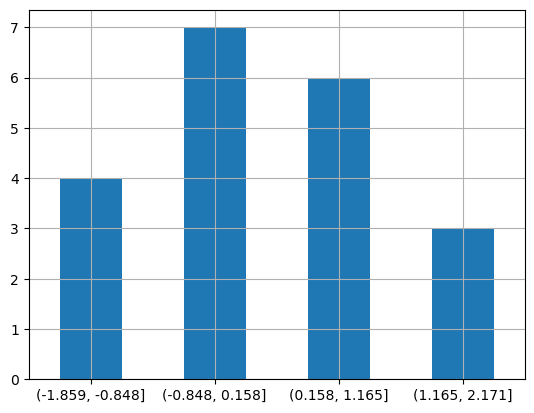

In [ ]:
factor.value_counts().sort_index().plot.bar(rot=0, grid=True)

4등분한 구간에 라벨을 붙이면 구간 정보의 의미를 보다 정확히 전달한다.

In [ ]:
factor = pd.cut(arr, bins=4, labels=['A', 'B', 'C', 'D'])
factor

0     C
1     A
2     C
3     C
4     C
5     D
6     B
7     B
8     B
9     B
10    D
11    C
12    A
13    B
14    C
15    A
16    D
17    B
18    A
19    B
dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']

<Axes: >

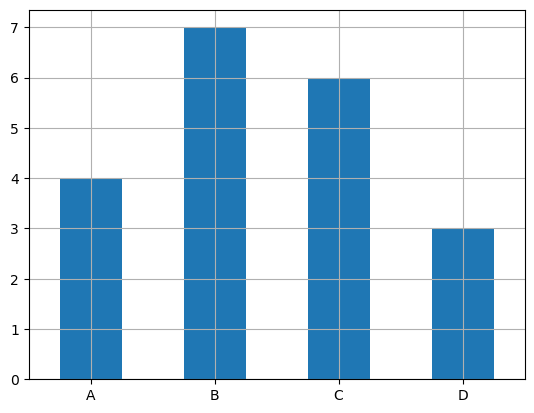

In [ ]:
factor.value_counts().sort_index().plot.bar(rot=0, grid=True)